# March 2022 - KMeans Clustering

## 1. Import Data and Libraries
## 2. Create Subset with only numerical data
## 3. Clean Data
## 4. Elbow Technique
## 5. K-Means Clustering
## 6. Check Clustering Stats
## 7. Final Observations

### 1. Import Data and Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# Display graphs without having to call

%matplotlib inline

In [3]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/Gov Employ Data/02 Data'

In [4]:
# Import Data

df = pd.read_pickle(os.path.join(path,'prepared data','March 2022 clean-a.pkl'))

In [5]:
df.shape

(2152679, 19)

In [6]:
df.head()

,sub_agency,country,age_level,education_level,pay_grade,years_grouping,occupation,occupation_category,pay_plan,stem,supervisor_status,full_time,work_status,date,salary,years_of_service,occupation_family,agency,state
0,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,BACHELORS,NaN,15 - 19,PROGRAM MANAGEMENT,Administrative,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,192500.0,18.8,"GENERAL ADMIN, CLERICAL, & OFFICE SVCS",ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
1,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,55-59,POST-BACHELORS,NaN,25 - 29,GENERAL ATTORNEY,Professional,ES-SENIOR EXECUTIVE SERVICE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,187000.0,29.2,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
2,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,SUPERVISOR OR MANAGER,Full time,Non-Seasonal Full Time Permanent,March 2022,161786.0,12.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,OKLAHOMA
3,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,35-39,POST-BACHELORS,15.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,158383.0,10.5,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA
4,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,United States,40-44,POST-BACHELORS,13.0,10 - 14,GENERAL ATTORNEY,Professional,GS-GENERAL SCHEDULE,0,UNSPECIFIED,Full time,Non-Seasonal Full Time Permanent,March 2022,121065.0,13.4,LEGAL AND KINDRED,ADMINISTRATIVE CONFERENCE OF THE UNITED STATES,DISTRICT OF COLUMBIA


### 2. Create Subset with only numerical data

In [7]:
columns = ['pay_grade','years_of_service','salary','stem']

In [8]:
#Create subset

sub = df[columns]

In [9]:
sub.head()

,pay_grade,years_of_service,salary,stem
0,NaN,18.8,192500.0,0
1,NaN,29.2,187000.0,0
2,15.0,12.5,161786.0,0
3,15.0,10.5,158383.0,0
4,13.0,13.4,121065.0,0


In [10]:
sub.shape

(2152679, 4)

### 3. Clean Data

In [11]:
# Check for missing values

sub.isnull().sum()

pay_grade           631944
years_of_service         0
salary              301029
stem                     0
dtype: int64

In [12]:
#Fix pay_grade NaN

In [13]:
paygrade_nan = sub[sub['pay_grade'].isnull() == True]

In [14]:
paygrade_nan

,pay_grade,years_of_service,salary,stem
0,NaN,18.8,192500.0,0
1,NaN,29.2,187000.0,0
6,NaN,12.4,199300.0,0
16,NaN,36.7,203252.0,0
26,NaN,1.8,104350.0,0
...,...,...,...,...
2155619,NaN,3.2,77780.0,0
2155620,NaN,0.6,42288.0,0
2155621,NaN,4.5,56661.0,0
2155622,NaN,0.3,55631.0,0


In [15]:
sub.pay_grade.mean()

10.60831440060234

In [16]:
sub.pay_grade.median()

12.0

In [17]:
sub.pay_grade.mode()

0    12.0
Name: pay_grade, dtype: float64

In [18]:
#replace pay_grade NaN values with median
sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4403/1276879238.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['pay_grade'] = sub['pay_grade'].fillna(sub['pay_grade'].median())


In [19]:
sub.isnull().sum()

pay_grade                0
years_of_service         0
salary              301029
stem                     0
dtype: int64

In [20]:
# Fix salary NaN

In [21]:
salary_nan = sub[sub['salary'].isnull() == True]

In [22]:
salary_nan

,pay_grade,years_of_service,salary,stem
93,14.0,15.3,NaN,0
97,15.0,13.2,NaN,0
100,13.0,13.4,NaN,0
101,14.0,12.6,NaN,0
102,13.0,17.4,NaN,0
...,...,...,...,...
2155580,12.0,1.0,NaN,0
2155586,12.0,2.1,NaN,0
2155587,12.0,1.8,NaN,0
2155588,12.0,1.8,NaN,0


In [23]:
sub.salary.mean()

95563.19367267033

In [24]:
sub.salary.mode()

0    176300.0
Name: salary, dtype: float64

In [25]:
sub.salary.median()

87301.0

In [26]:
#replace pay_grade NaN values with median
sub['salary'] = sub['salary'].fillna(sub['salary'].mean())

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4403/4293097397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['salary'] = sub['salary'].fillna(sub['salary'].mean())


In [27]:
sub.isnull().sum()

pay_grade           0
years_of_service    0
salary              0
stem                0
dtype: int64

### 4. Elbow Technique

In [28]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [29]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3966626251619894.0,
 -1675068184026818.0,
 -899795795388668.5,
 -466667747064083.5,
 -310975608905370.6,
 -224487534900681.06,
 -164818557588516.8,
 -125031289942281.31,
 -98490845675967.38]

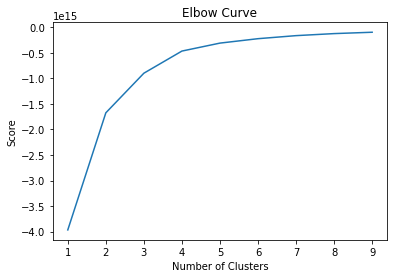

In [30]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

####  After standardizing the data and doing the elbow technique to find the curve, we can conclude that we should keep values up to 4.  From 4-5 is just a small increase and 5 and above is practically flat

### 5. K-Means Clustering

In [31]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [32]:
# Fit the k-means object to the data.

kmeans.fit(sub)

KMeans(n_clusters=4)

In [33]:
sub['clusters'] = kmeans.fit_predict(sub)

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4403/3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [34]:
sub.head()

,pay_grade,years_of_service,salary,stem,clusters
0,12.0,18.8,192500.0,0,0
1,12.0,29.2,187000.0,0,0
2,15.0,12.5,161786.0,0,0
3,15.0,10.5,158383.0,0,0
4,13.0,13.4,121065.0,0,1


In [35]:
sub['clusters'].value_counts()

1    1003361
2     749517
0     361838
3      37963
Name: clusters, dtype: int64

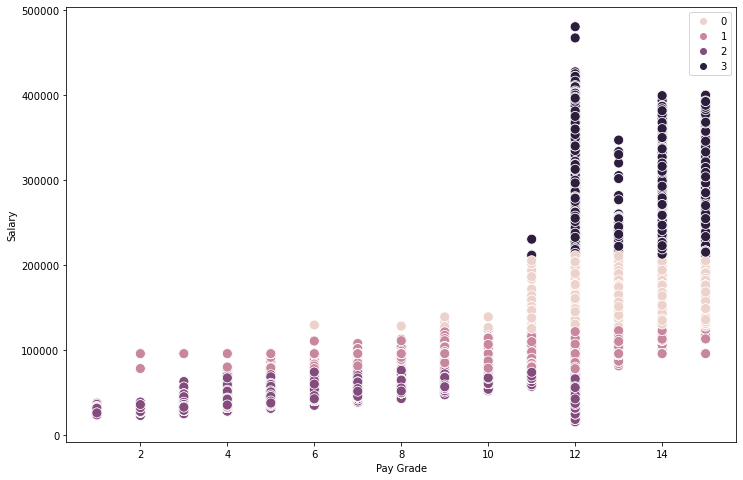

In [36]:
# Plot the clusters for the "Pay Grade" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['pay_grade'], y=sub['salary'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Pay Grade') # Label x-axis.
plt.ylabel('Salary') # Label y-axis.
plt.show()

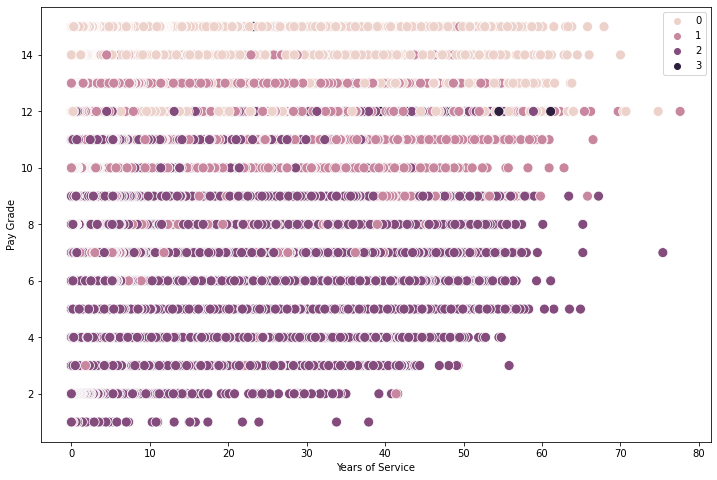

In [38]:
# Plot the clusters for the "Years of Service" and "Pay Grade" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['years_of_service'], y=sub['pay_grade'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Years of Service') 
plt.ylabel('Pay Grade') 
plt.show()

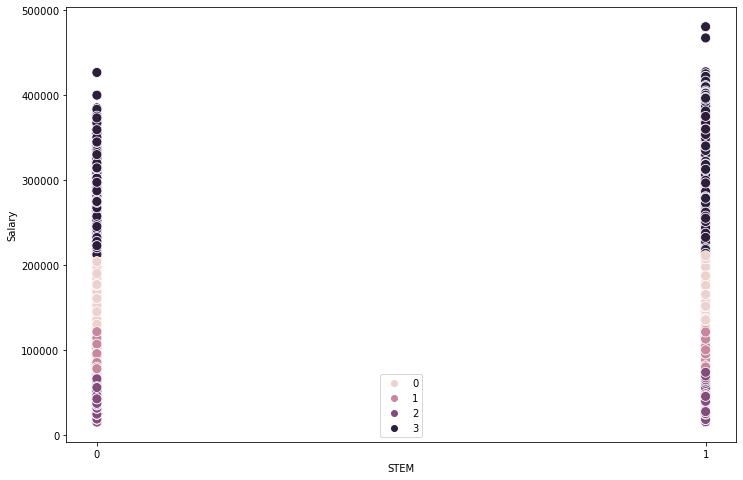

In [41]:
# Plot the clusters for the "Stem" and "Salary" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['stem'], y=sub['salary'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('STEM') 
plt.ylabel('Salary') 
plt.show()

### 6. Check Clustering Stats

In [39]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

/var/folders/rt/m2j4lb4d1jn3b18ck1_f2csm0000gn/T/ipykernel_4403/749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [40]:
sub.groupby('cluster').agg({'pay_grade':['mean', 'median'], 
                         'salary':['mean', 'median'], 
                         'years_of_service':['mean', 'median'],
                          'stem':['mean', 'median']})

pay_grade                salary                years_of_service  \
                  mean median           mean         median             mean   
cluster                                                                        
dark purple   8.728644    9.0   56047.880781   56551.000000         8.578534   
pink         13.248219   13.0  152178.680924  147561.000000        17.895665   
purple       11.873437   12.0   98040.133889   95563.193673        12.905893   

                   stem         
            median mean median  
cluster                         
dark purple    5.5  inf    0.0  
pink          16.2  inf    0.0  
purple        11.8  inf    0.0

### 7. Final Observations